In [1]:
def non_zero_avg(img):
    t_sum = 0
    count = 0
    for each in img:
        for every in each:
            if every>0:
                t_sum += every
                count +=1
    print(t_sum/count)
    return t_sum/count
    
    

In [2]:
import numpy as np
import cv2
def sum_line(img):
    sum= []
    for i in range(0,30):
        sum.append(np.sum(img[i]))
    return max(sum)

166.48026589115082
166.41053299492387
149.0
57.75784753363229
58.12428571428571
149.0
139.5683264694871
76.0
41.0985824742268
40.50646950092421
40.76
84.71828481889953
40.66195590729225
76.0


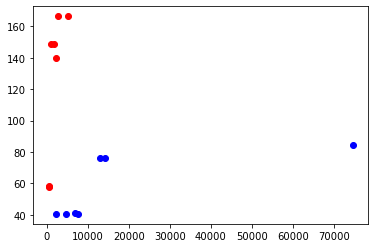

In [3]:

import matplotlib.pyplot as plt
feat_mat = [[0,0],[1,0],[0,1],[1,1]]
y = [[0],[0],[0],[0],[0],[0],[0],[1],[1],[1],[1],[1],[1],[1]]
R= []
name_list = ["poly1.png","poly2.png","poly3.png","poly4.png","poly5.png","poly6.png","poly7.png","poly8.png","poly9.png","poly10.png","poly11.png","poly12.png","poly13.png","poly14.png",]
for each in name_list:
    pth = "images/"+each
    img=cv2.imread(pth,0)
    for each in img:
        for i,every in enumerate(each):
            if every==255:
                each[i]=0
    R.append([sum_line(img),non_zero_avg(img)])
R_2= np.array(R)

plt.scatter(R_2[:7,0],R_2[:7,1],color="red")
plt.scatter(R_2[7:,0],R_2[7:,1],color="blue")


In [4]:
X=R_2
y=np.array(y)

In [5]:
X=np.append(np.ones(y.shape),X,1)
for i in range(0,y.shape[0]):
    if(y[i][0])==0:
        X[i][0]=X[i][0]*-1
        X[i][1]=X[i][1]*-1
        X[i][2]*=-1

[[-1.00000000e+00 -2.67700000e+03 -1.66480266e+02]
 [-1.00000000e+00 -5.09100000e+03 -1.66410533e+02]
 [-1.00000000e+00 -1.04300000e+03 -1.49000000e+02]
 [-1.00000000e+00 -4.02000000e+02 -5.77578475e+01]
 [-1.00000000e+00 -6.35000000e+02 -5.81242857e+01]
 [-1.00000000e+00 -1.63900000e+03 -1.49000000e+02]
 [-1.00000000e+00 -2.32900000e+03 -1.39568326e+02]
 [ 1.00000000e+00  1.29200000e+04  7.60000000e+01]
 [ 1.00000000e+00  6.97000000e+03  4.10985825e+01]
 [ 1.00000000e+00  2.33900000e+03  4.05064695e+01]
 [ 1.00000000e+00  4.55200000e+03  4.07600000e+01]
 [ 1.00000000e+00  7.46640000e+04  8.47182848e+01]
 [ 1.00000000e+00  7.66700000e+03  4.06619559e+01]
 [ 1.00000000e+00  1.42120000e+04  7.60000000e+01]]


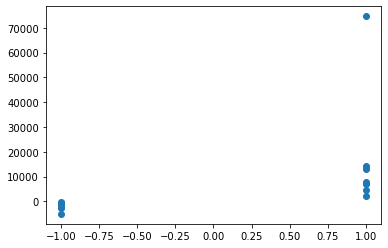

In [6]:
plt.scatter(X[:,0],X[:,1])
print(X)

1.3148055661461004 [ 211.15772854 -160.59996548] [[ 211.15772854 -160.59996548]]


c:\users\jason\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


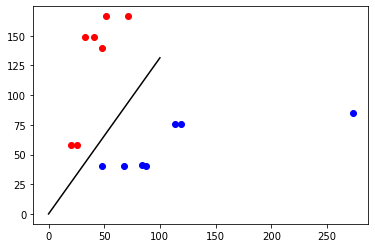

In [7]:
from sklearn.linear_model import SGDClassifier
import math
clf = SGDClassifier(loss = "hinge" , penalty ="l2",max_iter = 10000)
tmp=np.array(R)
tmp[:,0] = tmp[:,0]**0.5
clf.fit(tmp,y)
W = clf.coef_
w = clf.coef_[0]
a = -w[0] / w[1]
print(a,w,W)
xx = np.linspace(0,100)
yy = a * xx - (clf.intercept_[0]) / w[1]
plt.figure()
plt.plot(xx, yy, 'k-')
plt.scatter(tmp[:7,0],tmp[:7,1],color="red")
plt.scatter(tmp[7:,0],tmp[7:,1],color="blue")